# Exploratory Data Analysis on Titles + Selftext

_This notebook will be used to perform exploratory analysis on the combined titles and selftext entries, from analysis on the length of the post content to visualizing character counts and word counts by class._

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/joined.csv')

In [3]:
target = df['subreddit']

In [4]:
# Dropping selftext and title from dataframe
df = df.drop(['selftext','title'],axis=1)

_Created columns that numbered the character count and the word count of the joined entries._

In [5]:
df['joined'] = df['joined'].astype(str)

In [6]:
df['char_count'] = df['joined'].map(len)

In [7]:
df['word_count'] = df['joined'].map(lambda x: len(x.split()))

In [8]:
df.head()

,subreddit,joined,char_count,word_count
0,0,Husband was screwing his secretary up the ass ...,161,32
1,0,Why does Batman wear Dark clothing? Batman doe...,138,24
2,0,"A man is in court. The Judges says, on the 3rd...",1213,242
3,0,A poor old lady was forced to sell her valuabl...,1620,297
4,0,How do you get a nun pregnant? Dress her up as...,60,14


_Taking a quick look at the percentage of class distribution. The majority percentage will be the baseline value._

In [9]:
df['subreddit'].value_counts(normalize=True)

0    0.511884
1    0.488116
Name: subreddit, dtype: float64

## Visualizing character count and word count of selftext

In [10]:
df[df['char_count']>2000][['char_count','subreddit']]

,char_count,subreddit
80,3266,0
157,2121,0
174,3011,0
665,2416,0
693,2643,0
716,2069,0
767,2657,0
879,2147,0
1026,10764,1
1083,2206,1


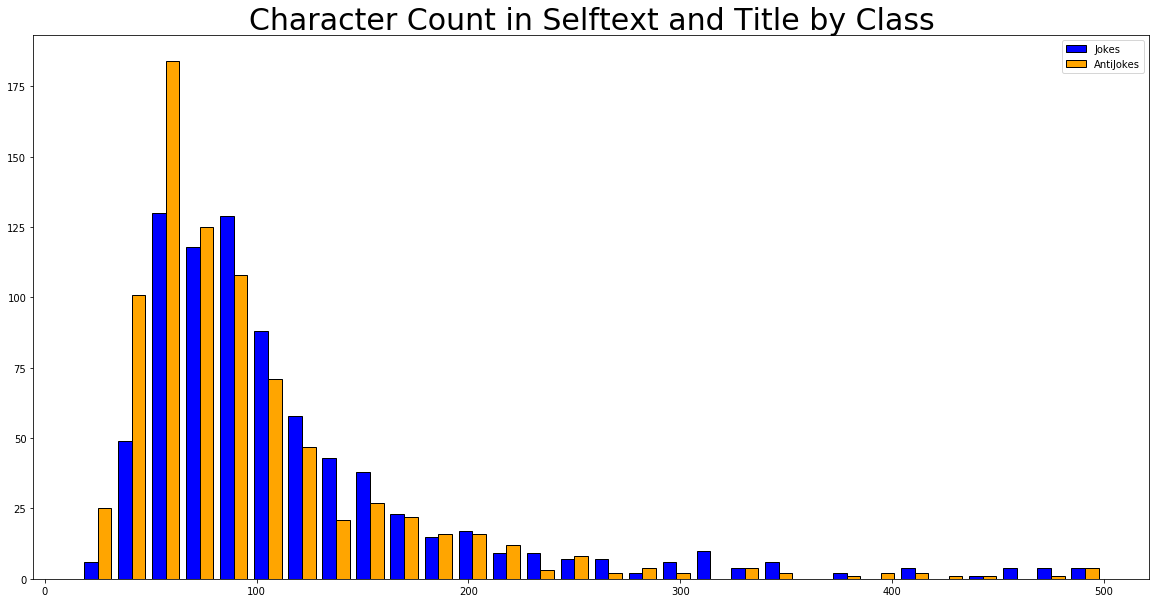

In [11]:
plt.figure(figsize=(20,10))
plt.hist([df[(df['subreddit']==0) & (df['char_count'] < 500)]['char_count'], 
          df[(df['subreddit']==1) & (df['char_count'] < 500)]['char_count']],
         bins=30, color=['blue', 'orange'], ec='k')

plt.title('Character Count in Selftext and Title by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);
plt.savefig('./images/char_count.png', bbox_inches='tight')

_Note, because of the outliers of the jokes, its difficult to see the distribution near the lower end. I limited the char counts to less than 500 for this graph. It seems that while both jokes and antijokes have the most of their distribution in the lower end (below 100), the antijokes char count is greater than jokes char count below 70, whereas the jokes char count is generally greater than the antijokes char count above 70. It seems that antijokes are shorter whereas jokes, while mostly short, are generally longer._

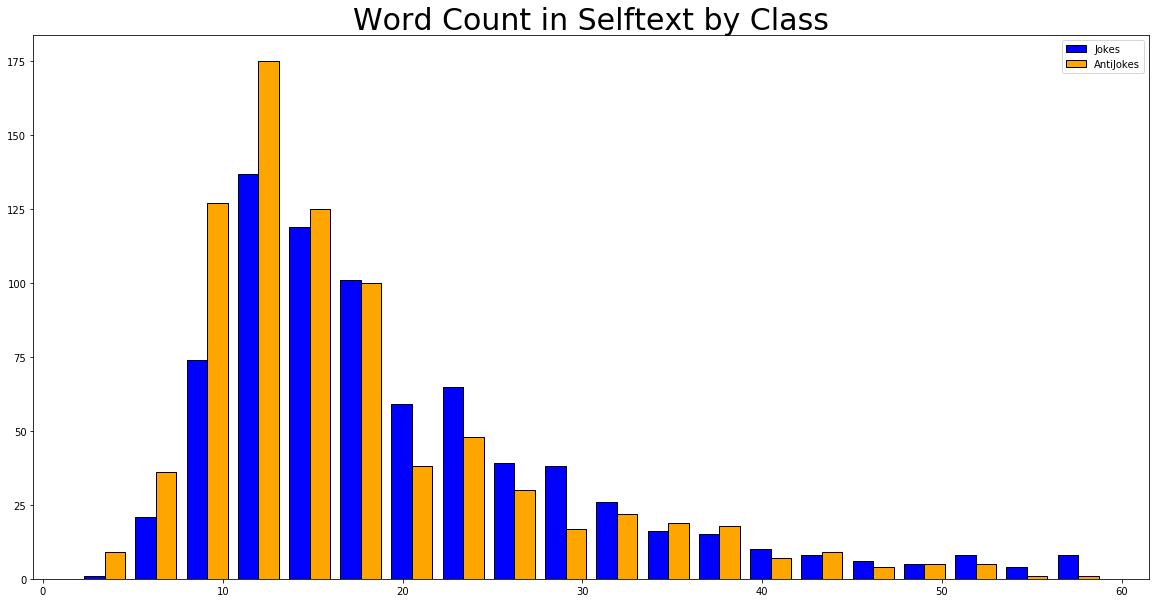

In [12]:
plt.figure(figsize=(20,10))
plt.hist([df[(df['subreddit']==0) & (df['word_count'] < 60)]['word_count'], 
          df[(df['subreddit']==1) & (df['word_count'] < 60)]['word_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Word Count in Selftext by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);
plt.savefig('./images/word_count.png', bbox_inches='tight')

_As with the Character counts graph, I limited the word counts to less than 60. As the graph shows, we can see that antijokes have a higher word count in the lower end (less than 16 words), and jokes have a higher word count (generally) above 16 words. All in all, the distributions of the character and word counts are telling. Antijokes generally have a lower character and word count, and jokes have a higher count for both. This makes sense since antijokes are usually pithy one-liners that go against conventional joke punchlines._

## Lemmatizing and CountVectorizing

_First, titles must be tokenized and lemmatized._

In [13]:
# Tokenizing by alphanumeric characters
tokenizer = RegexpTokenizer('\w+')

# Making all tokens lowercase
tokens = [tokenizer.tokenize(post.lower()) for post in (df['joined'])]

In [14]:
tokens

[['husband',
  'was',
  'screwing',
  'his',
  'secretary',
  'up',
  'the',
  'ass',
  'when',
  'his',
  'wife',
  'walked',
  'in',
  'wife',
  'sobbing',
  'you',
  'can',
  't',
  'do',
  'this',
  'to',
  'me',
  'husband',
  'i',
  'know',
  'that',
  's',
  'why',
  'i',
  'am',
  'doing',
  'it',
  'with',
  'her'],
 ['why',
  'does',
  'batman',
  'wear',
  'dark',
  'clothing',
  'batman',
  'doesn',
  't',
  'want',
  'to',
  'get',
  'shot',
  'why',
  'does',
  'robin',
  'wear',
  'bright',
  'clothing',
  'batman',
  'doesn',
  't',
  'want',
  'to',
  'get',
  'shot'],
 ['a',
  'man',
  'is',
  'in',
  'court',
  'the',
  'judges',
  'says',
  'on',
  'the',
  '3rd',
  'august',
  'you',
  'are',
  'accused',
  'of',
  'killing',
  'your',
  'wife',
  'by',
  'beating',
  'her',
  'to',
  'death',
  'with',
  'a',
  'hammer',
  'how',
  'do',
  'you',
  'plead',
  'guilty',
  'said',
  'the',
  'man',
  'in',
  'the',
  'dock',
  'at',
  'this',
  'point',
  'a',
  'ma

In [15]:
# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating a list of posts (selftext) that are lemmatized
# First had to lemmatize for each word in post, 
# then rejoin words into one string for post
lems = []
for post in tokens:
    tok_post = []
    for word in post:
        tok_post.append(lemmatizer.lemmatize(word))
    posts = " ".join(tok_post)
    lems.append(posts)

In [16]:
lems

['husband wa screwing his secretary up the as when his wife walked in wife sobbing you can t do this to me husband i know that s why i am doing it with her',
 'why doe batman wear dark clothing batman doesn t want to get shot why doe robin wear bright clothing batman doesn t want to get shot',
 'a man is in court the judge say on the 3rd august you are accused of killing your wife by beating her to death with a hammer how do you plead guilty said the man in the dock at this point a man at the back of the court stood up and shouted you dirty rat the judge asked the man to site down and to refrain from making any noise the judge continued and that also on the 17th september you are accused of killing your son by beating him to death with a hammer how do you plead guilty said the man in the dock again the same man at the back stood up and shouted even louder you dirty rotten stinking rat at this point the judge called the man to the bench and said i have already asked you to be quiet if y

In [17]:
# Initializing a count vectorizer and fitting it
vect = CountVectorizer(analyzer='word', stop_words = 'english', min_df = 3)
terms = vect.fit_transform(lems)
text = pd.DataFrame(terms.todense(), columns = vect.get_feature_names())

In [18]:
text.head()

,000,10,100,1000,11,12,15,17,20,2018,...,yelled,yelling,yellow,yes,yesterday,yo,young,younger,youtube,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Insert the target back into the DataFrame
text.insert(0, 'target',target)

In [20]:
text.head()

,target,000,10,100,1000,11,12,15,17,20,...,yelled,yelling,yellow,yes,yesterday,yo,young,younger,youtube,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the most common words

In [21]:
# Creating a dictionary for the most common words to the counts
term_counts = {col : text[col].sum() for col in text.columns[1:]}

# Creating a DataFrame for the Term Count Distribution (tcd)
tcd = pd.DataFrame(term_counts, index = ['counts'])
tcd = tcd.T
tcd.head()

,counts
000,10
10,28
100,14
1000,6
11,8


In [22]:
# Sort the tcd by count values
tcd.sort_values(by="counts", ascending=False).head(10)

,counts
wa,588
say,294
like,276
man,271
did,251
said,223
just,181
know,164
don,159
black,142


In [24]:
# Take the top 20 words and visualize them into a heatmap
top20 = list(tcd.sort_values(by = 'counts', ascending = False).head(20).index)
# Also added target to the list
top20.append('target')

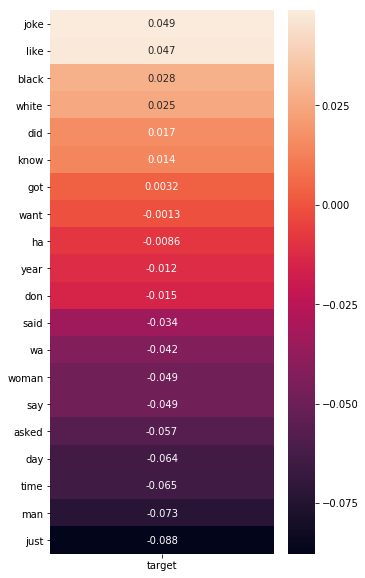

In [40]:
# Creating the heatmap
plt.figure(figsize = (5,10))
corr = text[top20].corr()[['target']].sort_values(by='target', ascending=False).iloc[1:]
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True);
plt.savefig('./images/heatmap.png', bbox_inches='tight')

_There seems to be no strong correlations between the target and any words according to the visualization._

In [ ]:
# Terms that are least correlated to the target
text.corr().sort_values(by='target')['target'].head(12)

In [ ]:
# Terms that are most correlated to the target
text.corr().sort_values(by='target', ascending=False)['target'].head(12)

_Some words that are negatively correlated to target (or more correlated to the joke class) are 'asks', 'reply', 'just', 'came', 'lady'. Some words that are positively correlated to target are 'coffee', 'anti', and 'seriously'._

_Next, I used `groupby` to get some aggregates (mainly `sum` and `mean`) over the classes._

In [ ]:
# Getting the term frequency relative to the target
text.groupby('target').mean().T.sort_values(by=0, ascending=False)

In [ ]:
text.groupby('target').sum().T.sort_values(by=0, ascending=False)

### Looking for common words between the classes and conducting a hypothesis test to see if those words have the same mean frequency

In [ ]:
# Getting the top 50 words for both classes
top_words_jokes = list(text.groupby('target').mean().T.sort_values(0, ascending=False).head(50).index)
top_words_ajokes = list(text.groupby('target').mean().T.sort_values(1, ascending=False).head(50).index)

In [ ]:
# A list of words that are in the top 50 for both classes
top_words_overlap = [joke for joke in top_words_jokes if joke in top_words_ajokes]

In [ ]:
top_words_overlap

_Conducting a hypothesis test on the overlap words to see if those words have the same mean frequency in both classes. As a question: will these words provide signal or noise in our model if they are included? We will set our alpha to 0.01._

$H_0$: The /r/Jokes and the /r/AntiJokes subreddits have the same mean frequency for word $x$.  
$H_A$: The /r/Jokes and the /r/AntiJokes subreddits do not have the same mean frequency for word $x$.

In [ ]:
# Importing the scipy.stats library to access the t-test function
from scipy.stats import ttest_ind

# Storing P-value, t-stat, and word into a dictionary
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(text[text['target']==1][word], 
                                 text[text['target']==0][word])

In [ ]:
len(ttest_dict)

In [ ]:
ttest_dict

_Looking at the p-values of the words in the dictionary, we can conclude the following:_  
- Accept $H_0$ for:  
    - wa, say, said, did, like, asked, woman, don, know, year, wife, good, want, got, ha, people, make, tell, didn, joke, x200b, way, think, walk, ll, home
- Reject $H_0$ for:  
    - man, just, day, time, doe
    
_Therefore, words for which we accepted the null hypothesis can be included in our stop words list since they will only add noise. The words for which we rejected the null hypothesis will be important in identfying signal in our model._

## Using TF-IDF to compare results to CountVectorization

In [ ]:
# Importing the TFIDF module
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df accepts words that appear less often
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=1.0)

term_mat_t = tfidf.fit_transform(lems)
term_tfidf = pd.DataFrame(term_mat_t.toarray(), columns=tfidf.get_feature_names())

In [ ]:
term_tfidf.shape

In [ ]:
# Getting the max, mean, and sum for each word in the TFIDF vectorization
col_max = {col: [term_tfidf[col].max(), 
                 term_tfidf[col].mean(),
                 term_tfidf[col].sum()] for col in term_tfidf.columns}

tf_df = pd.DataFrame(col_max, index = ['max','mean','sum']).T

In [ ]:
tf_df.head()

In [ ]:
tf_df.sort_values(by = ['max','sum'], ascending = False).head(35)

_According to TFIDF, some common words are woman, difference, friend, knock, dead, etc._

## Sentiment Analysis by Class

In [ ]:
# Importing the Sentiment Analysis module
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initializing the SIA, creating a dict
sia = SentimentIntensityAnalyzer()
dicts = []

# Getting a SIA score for each lemmatized title
for st in lems:
    scores = sia.polarity_scores(st)
    scores['text'] = st
    dicts.append(scores)
    
# Creating a dataframe with the dictionary, adding target
df_sent = pd.DataFrame(dicts)
df_sent['target'] = target

In [ ]:
# Grouping scores by target
df_sent.groupby(by='target').mean()

_Looking at the sentiment analysis scores by target, there seems to be a slightly more negative mean sentiment score (0.04 difference) in Antijokes and more neutral sentiment in Jokes. In general, jokes (target = 0) have a very slightly positive compound score whereas antijokes (target = 1) have a very slightly negative compound score._

## Exploratory Data Analysis on Selftext (Content) - Conclusions
- Generally speaking, the titles of jokes and antijokes are telling in that Antijokes have more shorter posts (less than 16 words) than Jokes, and Jokes have more posts that are longer.
- Some words to add to the stop words list (words that add noise) are wa, say, said, did, like, asked, woman, don, know, year, wife, good, want, got, ha, people, make, tell, didn, joke, x200b, way, think, walk, ll, home
- Antijokes are slightly more negative in sentiment scores than jokes.